In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pmra_outliers= pd.read_csv('pmra_outliers.csv')

In [3]:
pmra_outliers.head()

,Unnamed: 0,source_id,ra,dec,l,b,parallax,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,dr2_radial_velocity,dr2_radial_velocity_error,r_med_geo,r_lo_geo,r_hi_geo,cube_id,pmra_deviation,pmdec_deviation
0,145572,2343051792663454976,9.988743,-28.035375,12.649668,-87.298757,4.889204,315.47690,364.193786,0.014907,-147.380689,0.013941,-46.355637,2.122902,203.731020,203.10910,204.340560,0,-343.797461,127.025179
1,2234418,2318914523136657792,8.259353,-29.074708,6.234956,-85.500016,11.751412,852.61940,-127.881662,0.015425,-69.914325,0.013069,-2.713808,0.216948,84.893135,84.78940,85.005550,0,148.277987,49.558816
2,2235300,2320174597821925504,5.224313,-29.690209,10.261629,-82.814269,12.224113,379.63440,-116.179322,0.033126,-85.228552,0.031795,-6.365917,0.192952,81.603070,81.38137,81.827560,0,136.575647,64.873043
3,2236525,2321900178242305664,5.197157,-28.899680,16.477153,-83.008911,14.723607,113.35716,-124.597912,0.109571,-249.947421,0.117070,37.947906,1.550238,67.946014,67.39255,68.458755,0,144.994237,229.591912
4,2237181,2316954295766878080,4.951248,-30.906005,2.406730,-82.123134,2.956088,194.06468,200.038259,0.015128,-30.805249,0.015542,-23.742700,4.483841,334.139280,332.69025,335.533540,0,-179.641934,10.449740


In [4]:
cubes= pd.read_csv('cubos.csv')

In [5]:
cubes.columns[0]

'Unnamed: 0'

In [6]:
cubes

,Unnamed: 0,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [7]:
cubes.rename(columns={f'{cubes.columns[0]}': 'cube_id'}, inplace=True)

In [8]:
cubes

,cube_id,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [48]:
data=pmra_outliers.merge(cubes, on='cube_id')
cube_1= data.query('cube_id == 1')
cube_1.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'l', 'b', 'parallax',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'dr2_radial_velocity', 'dr2_radial_velocity_error', 'r_med_geo',
       'r_lo_geo', 'r_hi_geo', 'cube_id', 'pmra_deviation', 'pmdec_deviation',
       'r_med', 'l_med', 'b_med', 'pmra_med', 'pmdec_med', 'std_pmra',
       'std_pmdec'],
      dtype='object')

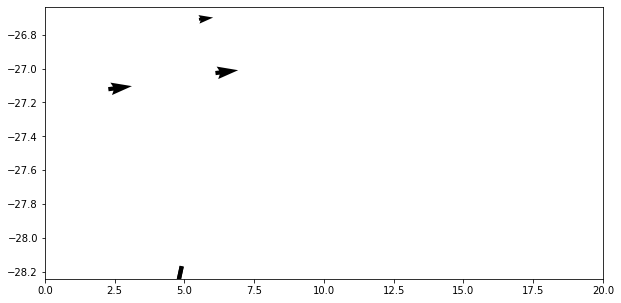

In [52]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.quiver(cube_1.ra, cube_1.dec, cube_1.pmra, cube_1.pmdec)
plt.xlim(0,20)
plt.show()